In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
taxi_train = pd.read_csv("KAGGLE_NY_TAXI/sample_train.csv")

In [3]:
taxi_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
taxi_test = pd.read_csv("KAGGLE_NY_TAXI/sample_test.csv",names=taxi_train.columns.values)

In [5]:
taxi_test.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-03-06 21:13:04.0000003,10.1,2010-03-06 21:13:04 UTC,-73.993113,40.755552,-73.969351,40.797908,1
1,2010-03-10 16:19:00.000000128,3.7,2010-03-10 16:19:00 UTC,-73.948102,40.770608,-73.952923,40.768025,1
2,2014-02-27 08:50:19.0000006,11.0,2014-02-27 08:50:19 UTC,-73.977236,40.743045,-73.997854,40.719837,1
3,2011-02-11 17:46:17.0000005,7.3,2011-02-11 17:46:17 UTC,-73.954060,39.603285,-73.977015,40.776712,3
4,2011-07-25 12:48:00.00000074,6.9,2011-07-25 12:48:00 UTC,-73.978575,40.753067,-73.964632,40.764258,1


In [6]:
taxi_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


Text(0, 0.5, 'Frequency')

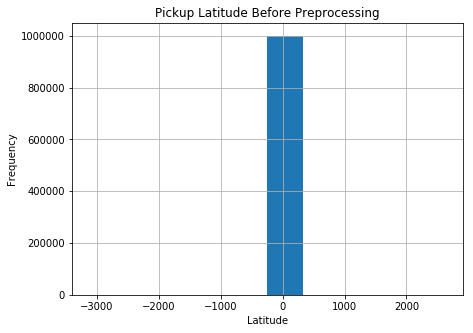

In [7]:
plt.figure(figsize=(7,5))
taxi_train.pickup_latitude.hist()
plt.title("Pickup Latitude Before Preprocessing")
plt.xlabel("Latitude")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

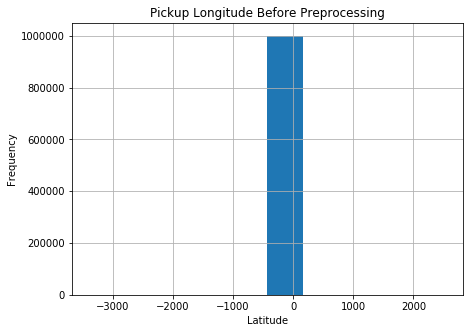

In [8]:
plt.figure(figsize=(7,5))
taxi_train.pickup_longitude.hist()
plt.title("Pickup Longitude Before Preprocessing")
plt.xlabel("Latitude")
plt.ylabel("Frequency")

The latitude of New York City, NY, USA is 40.730610, and the longitude is -73.935242

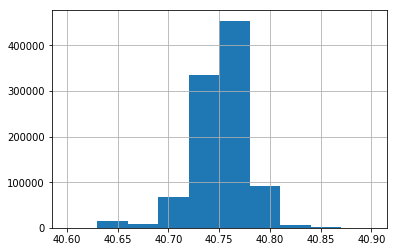

In [15]:
taxi_train_test[(taxi_train_test.pickup_latitude>40.6)&(taxi_train_test.pickup_latitude<40.9)].pickup_latitude.hist()

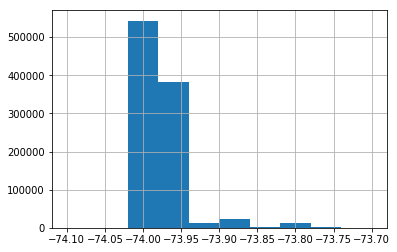

In [16]:
taxi_train_test[(taxi_train_test.pickup_longitude>-74.1)&(taxi_train_test.pickup_longitude<-73.7)].pickup_longitude.hist()

In [9]:
# base from the observation above, we set the boundary for latitude and longitude
max_lat = 40.9
min_lat = 40.6
max_lon = -73.7
min_lon = -74.1
taxi_clean = taxi_train[(taxi_train.pickup_latitude>min_lat)&
           (taxi_train.pickup_latitude<max_lat)&
           (taxi_train.dropoff_latitude>min_lat)&
           (taxi_train.dropoff_latitude<max_lat)&
           (taxi_train.pickup_longitude>min_lon)&
           (taxi_train.pickup_longitude<max_lon)&
           (taxi_train.dropoff_longitude>min_lon)&
           (taxi_train.dropoff_longitude<max_lon)]

In [10]:
taxi_test_clean = taxi_test[(taxi_test.pickup_latitude>min_lat)&
           (taxi_test.pickup_latitude<max_lat)&
           (taxi_test.dropoff_latitude>min_lat)&
           (taxi_test.dropoff_latitude<max_lat)&
           (taxi_test.pickup_longitude>min_lon)&
           (taxi_test.pickup_longitude<max_lon)&
           (taxi_test.dropoff_longitude>min_lon)&
           (taxi_test.dropoff_longitude<max_lon)]

In [11]:
# clean fare amount
taxi_test_clean = taxi_test_clean[taxi_test_clean.fare_amount>0]

In [12]:
taxi_clean = taxi_clean[taxi_clean.fare_amount>0]

In [13]:
# compute distance
import geopy.distance

distances = []
for coor1,coor2 in zip(zip(taxi_test_clean.pickup_latitude,taxi_test_clean.pickup_longitude),zip(taxi_test_clean.dropoff_latitude,taxi_test_clean.dropoff_longitude)):
    distances.append(geopy.distance.vincenty(coor1, coor2).miles)

In [14]:
taxi_test_clean["distance"] = distances

In [15]:
# compute distance
import geopy.distance

distances = []
for coor1,coor2 in zip(zip(taxi_clean.pickup_latitude,taxi_clean.pickup_longitude),zip(taxi_clean.dropoff_latitude,taxi_clean.dropoff_longitude)):
    distances.append(geopy.distance.vincenty(coor1, coor2).miles)

In [16]:
taxi_clean["distance"] = distances

In [17]:
taxi_clean.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.639764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,5.246511
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.863167
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,1.737223
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.241710


In [18]:
taxi_clean.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
count,975119.000000,975119.000000,975119.000000,975119.000000,975119.000000,975119.000000,975119.000000
mean,11.170748,-73.975468,40.750931,-73.974267,40.751414,1.684945,2.034063
std,9.109029,0.034118,0.026656,0.032803,0.030168,1.307763,2.158979
min,0.010000,-74.099610,40.600037,-74.099453,40.600014,0.000000,0.000000
25%,6.000000,-73.992261,40.736619,-73.991527,40.735802,1.000000,0.779203
50%,8.500000,-73.982086,40.753422,-73.980580,40.753934,1.000000,1.334763
75%,12.500000,-73.968359,40.767562,-73.965387,40.768414,2.000000,2.419649
max,500.000000,-73.700438,40.899536,-73.700155,40.899980,6.000000,19.216658


In [117]:
taxi_clean.to_csv("taxi_clean.csv")

Try Linear Regression using all the features for baseline

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
taxi_clean.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.639764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,5.246511
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.863167
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,1.737223
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.241710


In [21]:
taxi_clean.loc[:,["pickup_latitude","pickup_longitude","dropoff_latitude","dropoff_longitude","passenger_count"]].head()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count
0,40.721319,-73.844311,40.712278,-73.841610,1
1,40.711303,-74.016048,40.782004,-73.979268,1
2,40.761270,-73.982738,40.750562,-73.991242,2
3,40.733143,-73.987130,40.758092,-73.991567,1
4,40.768008,-73.968095,40.783762,-73.956655,1


In [36]:
X_train = taxi_clean.loc[:,["pickup_latitude","pickup_longitude","dropoff_latitude","dropoff_longitude","passenger_count"]].values

In [37]:
y_train = taxi_clean.fare_amount.values

In [19]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = X_train
y = y_train

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                 9.987e+04
Date:                Tue, 30 Oct 2018   Prob (F-statistic):               0.00
Time:                        21:42:12   Log-Likelihood:            -3.3363e+06
No. Observations:              975119   AIC:                         6.673e+06
Df Residuals:                  975113   BIC:                         6.673e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.749e+04     25.104    696.624      0.0

In [40]:
est2.mse_resid

54.87324010601942

In [54]:
X_test = taxi_test_clean.loc[:,["pickup_latitude","pickup_longitude","dropoff_latitude","dropoff_longitude","passenger_count"]].values

In [55]:
y_test = taxi_test_clean.loc[:,["fare_amount"]].values

In [56]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_test1 = sm.add_constant(X_test)
y_pred1 = est2.predict(X_test1)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred1))
print("Root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred1)))
print("Mean Absolute error: %.2f"
      % np.sqrt(mean_absolute_error(y_test, y_pred1)))
print('Variance score: %.2f' % r2_score(y_test, y_pred1))

Mean squared error: 53.36
Root Mean squared error: 7.30
Mean Absolute error: 2.20
Variance score: 0.34


In [43]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=20)
regr_1.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [57]:
y_train_pred = regr_1.predict(X_train)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_train, y_train_pred))
print("Root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Mean Absolute error: %.2f"
      % np.sqrt(mean_absolute_error(y_train, y_train_pred)))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_train, y_train_pred))

Mean squared error: 10.58
Root Mean squared error: 3.25
Mean Absolute error: 1.41
Variance score: 0.87


In [45]:
y_train[:10]

array([ 4.5, 16.9,  5.7,  7.7,  5.3, 12.1,  7.5, 16.5,  9. ,  8.9])

In [46]:
y_train_pred[:10]

array([ 4.93134328, 17.65263158,  7.28378474, 10.15930628,  7.27878898,
       10.15930628,  7.28378474, 14.29962535,  6.01279548, 10.15930628])

In [47]:
X_test = taxi_test_clean.loc[:,["pickup_latitude","pickup_longitude","dropoff_latitude","dropoff_longitude","passenger_count"]].as_matrix()
y_test = taxi_test_clean.fare_amount.values

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [58]:
# Make predictions using the testing set
y_test_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_test_pred))
print("Root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Mean Absolute error: %.2f"
      % np.sqrt(mean_absolute_error(y_test, y_test_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_test_pred))

Coefficients: 
 [-5.49216265e+01  9.34636352e+01 -4.67467650e+01  8.67822541e+01
  8.69525421e-02]
Mean squared error: 53.36
Root Mean squared error: 7.30
Mean Absolute error: 2.20
Variance score: 0.34


In [59]:
# Make predictions using the testing set
y_test_pred = regr_1.predict(X_test)


print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_test_pred))
print("Root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Mean Absolute error: %.2f"
      % np.sqrt(mean_absolute_error(y_test, y_test_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_test_pred))

Mean squared error: 21.94
Root Mean squared error: 4.68
Mean Absolute error: 1.57
Variance score: 0.73


### Using only distance and passenger_count

In [42]:
taxi_clean.loc[:,["distance","passenger_count"]].head()

,distance,passenger_count
0,0.639764,1
1,5.246511,1
2,0.863167,2
3,1.737223,1
4,1.241710,1


In [44]:
X_trainb = taxi_clean.loc[:,["distance","passenger_count"]].values

In [45]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

Xb = X_trainb
y = y_train

XbC = sm.add_constant(Xb)
estb = sm.OLS(y, XbC)
est2b = estb.fit()
print(est2b.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                 1.455e+06
Date:                Tue, 30 Oct 2018   Prob (F-statistic):               0.00
Time:                        22:23:35   Log-Likelihood:            -2.8639e+06
No. Observations:              975119   AIC:                         5.728e+06
Df Residuals:                  975116   BIC:                         5.728e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6834      0.009    424.898      0.0

In [48]:
X_test_b = taxi_test_clean.loc[:,["distance","passenger_count"]].values

In [53]:
y_test.shape

(100000, 1)

In [57]:
# Make predictions using the testing set
X_test2_b = sm.add_constant(X_test_b)
y_test_predb = est2b.predict(X_test2_b)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_test_predb))
print("Root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_test_predb)))
print("Mean Absolute error: %.2f"
      % np.sqrt(mean_absolute_error(y_test, y_test_predb)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_test_predb))

Mean squared error: 19.58
Root Mean squared error: 4.42
Mean Absolute error: 1.53
Variance score: 0.76


In [66]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr_1d = DecisionTreeRegressor(max_depth=20)
regr_1d.fit(X_train_d, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [67]:
# Make predictions using the testing set
y_test_pred = regr_1d.predict(X_test_d)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_test_pred))
print("Root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Mean Absolute error: %.2f"
      % np.sqrt(mean_absolute_error(y_test, y_test_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_test_pred))

Mean squared error: 22.66
Root Mean squared error: 4.76
Mean Absolute error: 1.55
Variance score: 0.72


### scrutinize the time variable

In [58]:
from datetime import datetime

def extract_time(time_str):
    #datetime_object = datetime.strptime('2010-03-06 21:13:04 UTC', '%Y-%m-%d %H:%M:%S UTC')
    datetime_object = datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S UTC')
    return (datetime_object.year,datetime_object.month,datetime_object.day,datetime_object.weekday(),datetime_object.hour)

In [59]:
taxi_clean_2 = taxi_clean.reset_index(drop=True)
time_pd = pd.DataFrame(taxi_clean_2.pickup_datetime.apply(lambda x:extract_time(x)).values.tolist(),columns=["year","month","date","dayofweek","hour"])
taxi_clean_2 = taxi_clean_2.join(time_pd)

In [189]:
print(taxi_clean.shape)
print(time_pd.shape)

(975119, 9)
(975119, 5)


In [87]:
taxi_test_clean_2 = taxi_test_clean.reset_index(drop=True)
time_pd = pd.DataFrame(taxi_test_clean_2.pickup_datetime.apply(lambda x:extract_time(x)).values.tolist(),columns=["year","month","date","dayofweek","hour"])
taxi_test_clean_2 = taxi_test_clean_2.join(time_pd)
#time_pd.head()
#taxi_test_clean.pickup_datetime.apply(lambda x:extract_time(x)).values
#,columns=["year","month","day","weekday","hour"]

In [192]:
taxi_clean_2.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,date,dayofweek,hour
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.639764,2009,6,15,0,17
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,5.246511,2010,1,5,1,16
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.863167,2011,8,18,3,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,1.737223,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.241710,2010,3,9,1,7


In [73]:
X_train_c = taxi_clean_2.loc[:,["passenger_count","distance","year","month","dayofweek","hour"]]

In [74]:
X_train_c.head()

,passenger_count,distance,year,month,dayofweek,hour
0,1,0.639764,2009,6,0,17
1,1,5.246511,2010,1,1,16
2,2,0.863167,2011,8,3,0
3,1,1.737223,2012,4,5,4
4,1,1.241710,2010,3,1,7


In [82]:
X_test_c.head()

,passenger_count,distance,year,month,dayofweek,hour
0,1,3.177380,2010.0,3.0,5.0,21.0
1,1,0.309408,2010.0,3.0,2.0,16.0
2,1,1.932819,2014.0,2.0,3.0,8.0
4,1,1.063729,2014.0,7.0,2.0,10.0
5,1,2.783113,2015.0,3.0,4.0,20.0


In [88]:
X_test_c = taxi_test_clean_2.loc[:,["passenger_count","distance","year","month","dayofweek","hour"]]

In [76]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

Xc = X_train_c.values
y = y_train

X2c = sm.add_constant(Xc)
estc = sm.OLS(y, X2c)
est2c = estc.fit()
print(est2c.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                 5.141e+05
Date:                Tue, 30 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:37:31   Log-Likelihood:            -2.8425e+06
No. Observations:              975119   AIC:                         5.685e+06
Df Residuals:                  975112   BIC:                         5.685e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1005.2273      4.919   -204.370      0.0

In [89]:
X2_testc = sm.add_constant(X_test_c.values)

y_predc = est2c.predict(X2_testc)

In [90]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_predc))
print("Root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_predc)))
print("Mean Absolute error: %.2f"
      % np.sqrt(mean_absolute_error(y_test, y_predc)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_predc))

Mean squared error: 18.71
Root Mean squared error: 4.33
Mean Absolute error: 1.50
Variance score: 0.77


In [103]:
X_train_d = taxi_clean_2.loc[:,["pickup_latitude","pickup_longitude","dropoff_latitude","dropoff_longitude","passenger_count","distance","year","month","dayofweek","hour"]]
X_test_d = taxi_test_clean_2.loc[:,["pickup_latitude","pickup_longitude","dropoff_latitude","dropoff_longitude","passenger_count","distance","year","month","dayofweek","hour"]]

In [113]:
X_train_d.head()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count,distance,year,month,dayofweek,hour
0,40.721319,-73.844311,40.712278,-73.841610,1,0.639764,2009,6,0,17
1,40.711303,-74.016048,40.782004,-73.979268,1,5.246511,2010,1,1,16
2,40.761270,-73.982738,40.750562,-73.991242,2,0.863167,2011,8,3,0
3,40.733143,-73.987130,40.758092,-73.991567,1,1.737223,2012,4,5,4
4,40.768008,-73.968095,40.783762,-73.956655,1,1.241710,2010,3,1,7


In [110]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr_1d = DecisionTreeRegressor(max_depth=15)
regr_1d.fit(X_train_d, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [111]:
# Make predictions using the testing set
y_test_pred = regr_1d.predict(X_test_d)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_test_pred))
print("Root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Mean Absolute error: %.2f"
      % np.sqrt(mean_absolute_error(y_test, y_test_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_test_pred))

Mean squared error: 15.32
Root Mean squared error: 3.91
Mean Absolute error: 1.36
Variance score: 0.81


In [217]:
# cluster the location to make a new feature vector
# cluster the location using kmeans
from sklearn.cluster import KMeans
import random

random.seed(1984)

#?KMeans

kmeaan_dropoff = KMeans(n_clusters=30)
kmeaan_dropoff.fit(taxi_clean.loc[:,["dropoff_longitude","dropoff_latitude"]].as_matrix())

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=30, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [219]:
random.seed(1984)


kmeaan_pickup = KMeans(n_clusters=30)
kmeaan_pickup.fit(taxi_clean.loc[:,["pickup_latitude","pickup_longitude"]].as_matrix())

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=30, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [257]:
pickup_cluster = kmeaan_pickup.transform(taxi_clean.loc[:,["pickup_latitude","pickup_longitude"]].as_matrix())

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [258]:
labels = ["Pickup {}".format(x) for x in range(30)]
pd.DataFrame(pickup_cluster,columns=labels).head()

,Pickup 0,Pickup 1,Pickup 2,Pickup 3,Pickup 4,Pickup 5,Pickup 6,Pickup 7,Pickup 8,Pickup 9,...,Pickup 20,Pickup 21,Pickup 22,Pickup 23,Pickup 24,Pickup 25,Pickup 26,Pickup 27,Pickup 28,Pickup 29
0,0.148392,0.120118,0.095730,0.056979,0.148336,0.147877,0.135349,0.145407,0.125644,0.149564,...,0.145429,0.011899,0.140015,0.153224,0.144468,0.125300,0.161250,0.130237,0.163756,0.057153
1,0.036403,0.083874,0.240129,0.159085,0.073813,0.026487,0.058018,0.108132,0.061618,0.045925,...,0.089050,0.183927,0.036896,0.053692,0.061924,0.116229,0.034422,0.068795,0.086188,0.125976
2,0.024586,0.028919,0.228843,0.114068,0.015496,0.039624,0.010638,0.048449,0.083632,0.014147,...,0.029617,0.155401,0.031584,0.010062,0.002108,0.056905,0.027691,0.014358,0.129029,0.088583
3,0.006965,0.047982,0.220108,0.124315,0.043913,0.011521,0.022962,0.076279,0.058370,0.017202,...,0.057842,0.155119,0.004593,0.027066,0.030574,0.081333,0.019842,0.033503,0.101043,0.092909
4,0.037891,0.013355,0.219966,0.098970,0.016339,0.051235,0.016765,0.037821,0.088149,0.029310,...,0.021746,0.143312,0.041494,0.025958,0.015157,0.041969,0.043458,0.007103,0.136445,0.075734


In [259]:
taxi_clean_3 = taxi_clean_2.join(pd.DataFrame(pickup_cluster,columns=labels))

In [260]:
pickup_cluster_test = kmeaan_pickup.transform(taxi_test_clean.loc[:,["pickup_latitude","pickup_longitude"]].as_matrix())
labels = ["Pickup {}".format(x) for x in range(30)]
taxi_test_clean_3 = taxi_test_clean_2.join(pd.DataFrame(pickup_cluster_test,columns=labels))

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [261]:
dropoff_cluster = kmeaan_dropoff.transform(taxi_clean.loc[:,["dropoff_latitude","dropoff_longitude"]].as_matrix())

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [262]:
labels = ["Dropoff {}".format(x) for x in range(30)]
pd.DataFrame(dropoff_cluster,columns=labels).head()

,Dropoff 0,Dropoff 1,Dropoff 2,Dropoff 3,Dropoff 4,Dropoff 5,Dropoff 6,Dropoff 7,Dropoff 8,Dropoff 9,...,Dropoff 20,Dropoff 21,Dropoff 22,Dropoff 23,Dropoff 24,Dropoff 25,Dropoff 26,Dropoff 27,Dropoff 28,Dropoff 29
0,162.125502,162.094246,162.127177,161.918508,162.138567,162.144938,162.045335,162.063541,162.160604,162.130367,...,162.148902,162.127892,162.114368,162.163110,162.138887,162.122252,162.124094,162.069081,162.001713,162.070674
1,162.272121,162.240889,162.273814,162.065156,162.285189,162.291585,162.191963,162.210197,162.307259,162.277008,...,162.295536,162.274525,162.260990,162.309779,162.285518,162.268866,162.270718,162.215697,162.148364,162.217270
2,162.258347,162.227130,162.260052,162.051401,162.271417,162.277830,162.178195,162.196448,162.293509,162.263249,...,162.281773,162.260760,162.247219,162.296037,162.271752,162.255089,162.256948,162.201922,162.134611,162.203481
3,162.263902,162.232683,162.265605,162.056953,162.276972,162.283382,162.183750,162.201999,162.299061,162.268801,...,162.287326,162.266314,162.252773,162.301587,162.277306,162.260645,162.262503,162.207477,162.140163,162.209039
4,162.257381,162.226140,162.259068,162.050405,162.270448,162.276835,162.177220,162.195444,162.292506,162.262261,...,162.280791,162.259780,162.246249,162.295021,162.270774,162.254128,162.255976,162.200958,162.133613,162.202538


In [263]:
taxi_clean_3 = taxi_clean_3.join(pd.DataFrame(dropoff_cluster,columns=labels))

In [264]:
taxi_test_clean.loc[:,["dropoff_latitude","dropoff_longitude"]].head()

,dropoff_latitude,dropoff_longitude
0,40.797908,-73.969351
1,40.768025,-73.952923
2,40.719837,-73.997854
3,40.764258,-73.964632
4,40.780437,-73.984134


In [265]:
dropoff_cluster_test = kmeaan_dropoff.transform(taxi_test_clean.loc[:,["dropoff_latitude","dropoff_longitude"]].as_matrix())
pd.DataFrame(dropoff_cluster_test,columns=labels).head()

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


,Dropoff 0,Dropoff 1,Dropoff 2,Dropoff 3,Dropoff 4,Dropoff 5,Dropoff 6,Dropoff 7,Dropoff 8,Dropoff 9,...,Dropoff 20,Dropoff 21,Dropoff 22,Dropoff 23,Dropoff 24,Dropoff 25,Dropoff 26,Dropoff 27,Dropoff 28,Dropoff 29
0,162.276362,162.245120,162.278048,162.069385,162.289429,162.295815,162.196200,162.214424,162.311486,162.281241,...,162.299771,162.278761,162.265230,162.314001,162.289754,162.273109,162.274957,162.219939,162.152593,162.221519
1,162.243611,162.212374,162.245301,162.036640,162.256678,162.263070,162.163451,162.181680,162.278743,162.248494,...,162.267023,162.246013,162.232480,162.281260,162.257006,162.240357,162.242207,162.187188,162.119848,162.188764
2,162.241295,162.210091,162.243009,162.034364,162.254366,162.260793,162.161148,162.179416,162.276477,162.246208,...,162.264729,162.243716,162.230168,162.279012,162.254706,162.238034,162.239899,162.184868,162.117577,162.186416
3,162.249223,162.217992,162.250917,162.042259,162.262291,162.268688,162.169065,162.187301,162.284363,162.254111,...,162.272639,162.251628,162.238092,162.286883,162.262620,162.245968,162.247820,162.192799,162.125467,162.194370
4,162.274452,162.243222,162.276147,162.067490,162.287521,162.293919,162.194295,162.212532,162.309594,162.279342,...,162.297869,162.276858,162.263322,162.312115,162.287850,162.271197,162.273050,162.218028,162.150698,162.219599


In [266]:
dropoff_cluster_test = kmeaan_dropoff.transform(taxi_test_clean.loc[:,["dropoff_latitude","dropoff_longitude"]].as_matrix())
labels = ["Dropoff {}".format(x) for x in range(30)]
taxi_test_clean_3 = taxi_test_clean_3.join(pd.DataFrame(dropoff_cluster_test,columns=labels))

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [267]:
taxi_test_clean_3.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,...,Dropoff 20,Dropoff 21,Dropoff 22,Dropoff 23,Dropoff 24,Dropoff 25,Dropoff 26,Dropoff 27,Dropoff 28,Dropoff 29
0,2010-03-06 21:13:04.0000003,10.1,2010-03-06 21:13:04 UTC,-73.993113,40.755552,-73.969351,40.797908,1,3.177380,2010,...,162.299771,162.278761,162.265230,162.314001,162.289754,162.273109,162.274957,162.219939,162.152593,162.221519
1,2010-03-10 16:19:00.000000128,3.7,2010-03-10 16:19:00 UTC,-73.948102,40.770608,-73.952923,40.768025,1,0.309408,2010,...,162.267023,162.246013,162.232480,162.281260,162.257006,162.240357,162.242207,162.187188,162.119848,162.188764
2,2014-02-27 08:50:19.0000006,11.0,2014-02-27 08:50:19 UTC,-73.977236,40.743045,-73.997854,40.719837,1,1.932819,2014,...,162.264729,162.243716,162.230168,162.279012,162.254706,162.238034,162.239899,162.184868,162.117577,162.186416
3,2011-07-25 12:48:00.00000074,6.9,2011-07-25 12:48:00 UTC,-73.978575,40.753067,-73.964632,40.764258,1,1.063729,2011,...,162.272639,162.251628,162.238092,162.286883,162.262620,162.245968,162.247820,162.192799,162.125467,162.194370
4,2014-07-23 10:16:44.0000001,20.5,2014-07-23 10:16:44 UTC,-73.997789,40.741463,-73.984134,40.780437,1,2.783113,2014,...,162.297869,162.276858,162.263322,162.312115,162.287850,162.271197,162.273050,162.218028,162.150698,162.219599


In [268]:
X_train = taxi_clean_3.iloc[:,7:]

In [269]:
X_test = taxi_test_clean_3.iloc[:,7:]

In [270]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = X_train.as_matrix()
y = y_train

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 8.378e+04
Date:                Thu, 25 Oct 2018   Prob (F-statistic):               0.00
Time:                        22:53:54   Log-Likelihood:            -2.8115e+06
No. Observations:              975119   AIC:                         5.623e+06
Df Residuals:                  975078   BIC:                         5.624e+06
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.675e+06   1.36e+05     12.343      0.0

In [271]:
X2_test = sm.add_constant(X_test)
y_pred2 = est2.predict(X2_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred2))
print("Root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred2)))
print("Mean Absolute error: %.2f"
      % np.sqrt(mean_absolute_error(y_test, y_pred2)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred2))

Mean squared error: 17.45
Root Mean squared error: 4.18
Mean Absolute error: 1.46
Variance score: 0.78


In [246]:
X_test

,passenger_count,distance,year,month,date,dayofweek,hour,Pickup 0,Pickup 1,Pickup 2,...,Dropoff 20,Dropoff 21,Dropoff 22,Dropoff 23,Dropoff 24,Dropoff 25,Dropoff 26,Dropoff 27,Dropoff 28,Dropoff 29
0,1,3.177380,2010,3,6,5,21,0.017226,0.040505,0.235158,...,162.299771,162.278761,162.265230,162.314001,162.289754,162.273109,162.274957,162.219939,162.152593,162.221519
1,1,0.309408,2010,3,10,2,16,0.054230,0.006960,0.205181,...,162.267023,162.246013,162.232480,162.281260,162.257006,162.240357,162.242207,162.187188,162.119848,162.188764
2,1,1.932819,2014,2,27,3,8,0.015215,0.034004,0.215319,...,162.264729,162.243716,162.230168,162.279012,162.254706,162.238034,162.239899,162.184868,162.117577,162.186416
3,1,1.063729,2011,7,25,0,12,0.019708,0.028415,0.221178,...,162.272639,162.251628,162.238092,162.286883,162.262620,162.245968,162.247820,162.192799,162.125467,162.194370
4,1,2.783113,2014,7,23,2,10,0.006807,0.050854,0.233211,...,162.297869,162.276858,162.263322,162.312115,162.287850,162.271197,162.273050,162.218028,162.150698,162.219599
5,1,3.804550,2015,3,27,4,20,0.098839,0.055693,0.233680,...,162.268269,162.247258,162.233725,162.282506,162.258251,162.241602,162.243452,162.188433,162.121094,162.190009
6,1,1.016208,2009,3,4,2,19,0.041370,0.025532,0.234062,...,162.288768,162.267757,162.254218,162.303024,162.278749,162.262091,162.263947,162.208923,162.141603,162.210487
7,1,3.547288,2014,1,13,0,16,0.055774,0.028453,0.236838,...,162.273472,162.252460,162.238917,162.287740,162.263451,162.246787,162.248647,162.193620,162.126313,162.195176
8,1,0.934760,2010,5,10,0,12,0.012570,0.052986,0.238846,...,162.271653,162.250640,162.237095,162.285928,162.261631,162.244963,162.246825,162.191797,162.124497,162.193349
9,5,3.887567,2011,2,25,4,23,0.011600,0.047888,0.215596,...,162.216769,162.195755,162.182204,162.231064,162.206745,162.190068,162.191936,162.136902,162.069623,162.138443
